<a href="https://colab.research.google.com/github/ramonfsk/machineLearning/blob/master/prevQtdTransacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, timezone
import matplotlib.pyplot as plt

#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
#lista_feriados['Data'] = pd.to_datetime(lista_feriados['Data'], format='%Y-%m-%d')
#lista_feriados['diaSemana'] = lista_feriados['Data'].dt.dayofweek
#lista_feriados = pd.read_excel('./feriados_nacionais.xls')
dados = pd.read_csv('./transactions.csv')
dados.columns = ['data', 'qtdTrsc']
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')
dados['diaMes'] = dados['data'].dt.day
dados['diaSemana'] = (dados['data'].dt.dayofweek)
dados['diaUtil'] = (dados['diaSemana'] < 5)
dados['fds'] = (dados['diaSemana'] >= 5)
dados['qntDiaUtil'] = ((dados['fds'] == False) & (dados['diaMes'] == 5))
dados['decDiaUtil'] = ((dados['fds'] == False) & (dados['diaMes'] == 10))
dados['segDia10'] = ((dados['data'].dt.dayofweek == 0) & (dados['diaMes'] == 10))
#dados['1SemanaMes'] = (dados['data'].dt.day < 8)
#dados['2SemanaMes'] = ((dados['data'].dt.day > 7) & (dados['data'].dt.day < 15))
#dados['3SemanaMes'] = ((dados['data'].dt.day > 14) & (dados['data'].dt.day < 22))
#dados['4SemanaMes'] = ((dados['data'].dt.day > 21) & (dados['data'].dt.day < 31))
#dados['feriadoDiaUtil'] = dados['data'] == lista_feriados.Data['2014-06-01':]
print(dados.dtypes)
#print(lista_feriados.dtypes)
#data_e_hora_atuais = datetime.now()
#print(data_e_hora_atuais)
#fuso_horario = timezone(-3)
#print(fuso_horario)

data          datetime64[ns]
qtdTrsc                int64
diaMes                 int64
diaSemana              int64
diaUtil                 bool
fds                     bool
qntDiaUtil              bool
decDiaUtil              bool
segDia10                bool
dtype: object


In [2]:
trocar = {
    True : 1,
    False : 0
}
dados.diaUtil = dados.diaUtil.map(trocar)
dados.fds = dados.fds.map(trocar)
dados['qntDiaUtil'] = dados['qntDiaUtil'].map(trocar)
dados['decDiaUtil'] = dados['decDiaUtil'].map(trocar)
dados['segDia10'] = dados['segDia10'].map(trocar)
dados.tail()

,data,qtdTrsc,diaMes,diaSemana,diaUtil,fds,qntDiaUtil,decDiaUtil,segDia10
1808,2019-05-16,36587356,16,3,1,0,0,0,0
1809,2019-05-17,36779502,17,4,1,0,0,0,0
1810,2019-05-18,10461572,18,5,0,1,0,0,0
1811,2019-05-19,6819558,19,6,0,1,0,0,0
1812,2019-05-20,49935265,20,0,1,0,0,0,0


In [3]:
dados.dtypes
#dados.query('feriadoDiaUtil == True').tail()
#lista_feriados.head(10)

data          datetime64[ns]
qtdTrsc                int64
diaMes                 int64
diaSemana              int64
diaUtil                int64
fds                    int64
qntDiaUtil             int64
decDiaUtil             int64
segDia10               int64
dtype: object

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


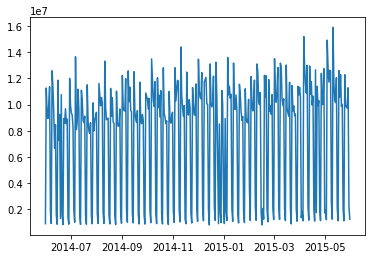

In [4]:
x = dados.data[:365]
y = dados.qtdTrsc[:365]

plt.plot(x, y)

In [5]:
dados.describe().round(2)

,qtdTrsc,diaMes,diaSemana,diaUtil,fds,qntDiaUtil,decDiaUtil,segDia10
count,1813.00,1813.00,1813.0,1813.00,1813.00,1813.00,1813.00,1813.00
mean,16326380.53,15.66,3.0,0.71,0.29,0.02,0.02,0.00
std,12131602.82,8.79,2.0,0.45,0.45,0.15,0.15,0.06
min,549024.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,6091927.00,8.00,1.0,0.00,0.00,0.00,0.00,0.00
50%,13094845.00,16.00,3.0,1.00,0.00,0.00,0.00,0.00
75%,27202236.00,23.00,5.0,1.00,1.00,0.00,0.00,0.00
max,51959223.00,31.00,6.0,1.00,1.00,1.00,1.00,1.00


In [6]:
dados.corr().round(4)

,qtdTrsc,diaMes,diaSemana,diaUtil,fds,qntDiaUtil,decDiaUtil,segDia10
qtdTrsc,1.0000,-0.0622,-0.5733,0.6511,-0.6511,0.1028,0.1143,0.0881
diaMes,-0.0622,1.0000,-0.0002,-0.0021,0.0021,-0.1890,-0.0992,-0.0401
diaSemana,-0.5733,-0.0002,1.0000,-0.7904,0.7904,-0.0759,-0.0713,-0.0933
diaUtil,0.6511,-0.0021,-0.7904,1.0000,-1.0000,0.0984,0.0973,0.0393
fds,-0.6511,0.0021,0.7904,-1.0000,1.0000,-0.0984,-0.0973,-0.0393
qntDiaUtil,0.1028,-0.1890,-0.0759,0.0984,-0.0984,1.0000,-0.0240,-0.0097
decDiaUtil,0.1143,-0.0992,-0.0713,0.0973,-0.0973,-0.0240,1.0000,0.4043
segDia10,0.0881,-0.0401,-0.0933,0.0393,-0.0393,-0.0097,0.4043,1.0000


In [7]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

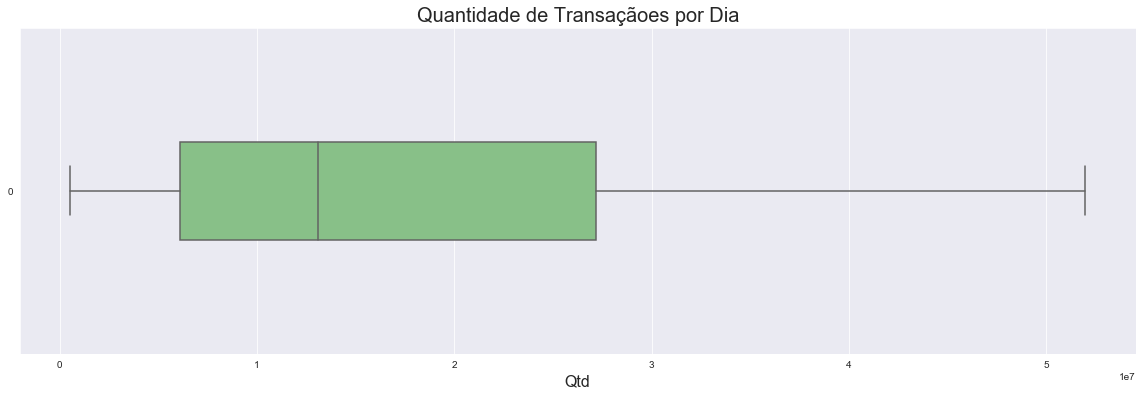

In [8]:
ax = sns.boxplot(data=dados.qtdTrsc, orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Quantidade de Transaçãoes por Dia', fontsize=20)
ax.set_xlabel('Qtd', fontsize=16)
ax

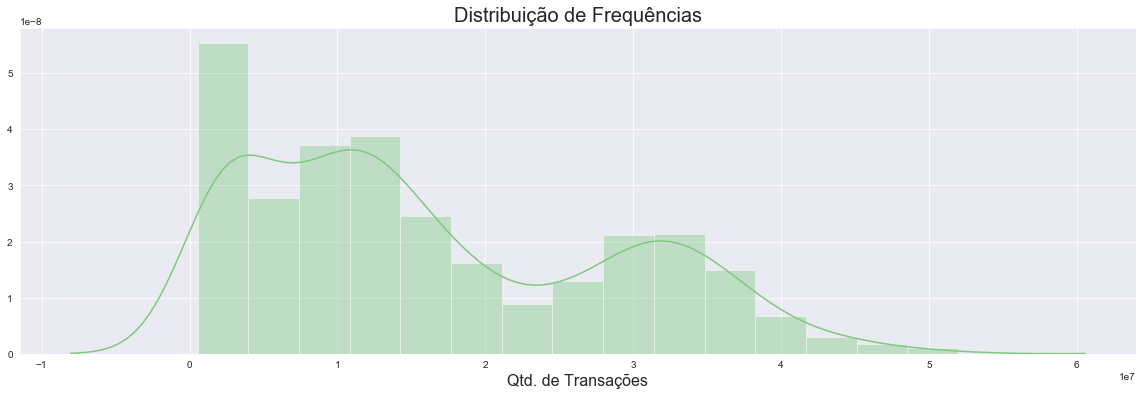

In [9]:
ax = sns.distplot(dados.qtdTrsc)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Qtd. de Transações', fontsize=16)
ax

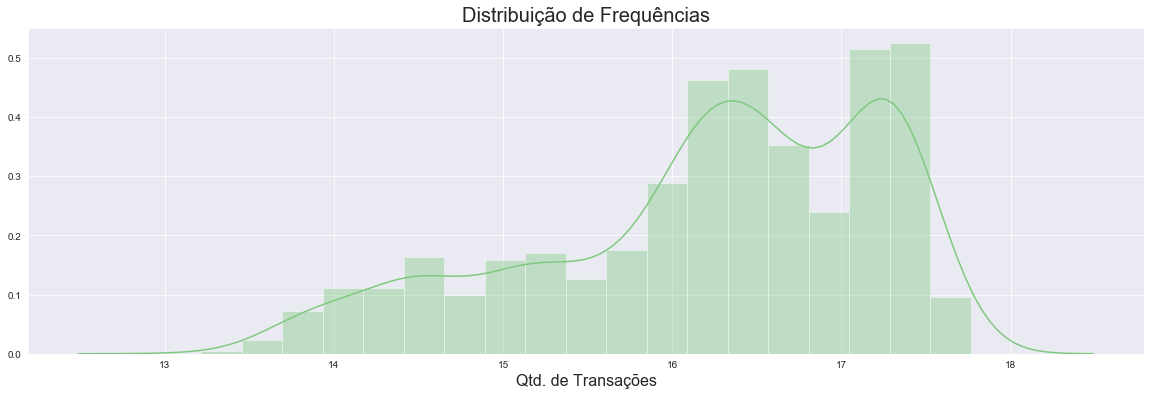

In [10]:
dados['log_qtdTrsc'] = np.log(dados.qtdTrsc)
ax = sns.distplot(dados['log_qtdTrsc'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Qtd. de Transações', fontsize=16)
ax
#esse modelo acima é inviável, apenas o descarte

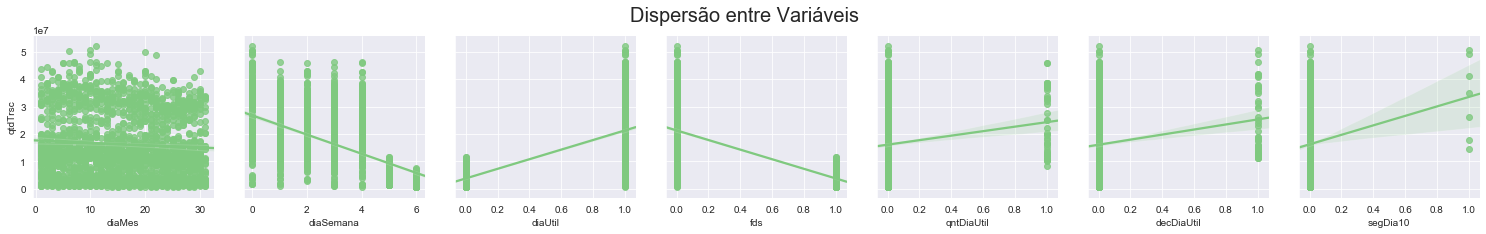

In [11]:
ax = sns.pairplot(
    dados, y_vars='qtdTrsc', 
    x_vars=['diaMes', 'diaSemana', 'diaUtil', 'fds', 'qntDiaUtil', 'decDiaUtil', 'segDia10'],
    height=3,
    kind='reg'
)
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.07)
ax

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split

df_train, df_valid = dados.loc[dados.data < '2018-05-31'], dados.loc[(dados.data >= '2018-06-01') & (dados.data < '2019-01-01')]
x_train, y_train = df_train.drop(['qtdTrsc','data'], axis=1).values, df_train.qtdTrsc.values
x_valid, y_valid = df_valid.drop(['qtdTrsc','data'], axis=1).values, df_valid.qtdTrsc.values

xgb_model = XGBRegressor()
lgb_model = LGBMRegressor()
models = (xgb_model, lgb_model)

def train_models(x, y):
    for model in models:
        model.fit(x, y)

train_models(x_train, y_train)

xgb_model.score(x_train, y_train), lgb_model.score(x_train, y_train)

[15:23:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9999500020418393, 0.9995142217965518)

In [47]:
diaMes = 10
diaSemana = 0
diaUtil = 1
fds = 0
dia5Util = 0
dia10Util = 1
segDia10 = 1

entrada = [[diaMes, diaSemana, diaUtil, fds, dia5Util, dia10Util, segDia10]]

print('Qtd: {0:.2f}'.format(lgb_model.predict(entrada)[0]))

ValueError: Number of features of the model must match the input. Model n_features_ is 8 and input n_features is 7 

In [13]:
import statsmodels.api as sm

x_train_constante = sm.add_constant(x_train)
#x_train_constante.head()
modelo_stats = sm.OLS(y_train, x_train_constante, hasconst=True).fit()
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     950.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:21:43   Log-Likelihood:                -24384.
No. Observations:                1460   AIC:                         4.878e+04
Df Residuals:                    1452   BIC:                         4.883e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.039e+08   2.12e+06    -49.063      0.0

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = dados[['diaMes', 'diaSemana','diaUtil', 'fds', 'qntDiaUtil', 'decDiaUtil', 'segDia10']][:730]
y = dados['qtdTrsc'][:730]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

modelo = LinearRegression()
modelo.fit(x_train, y_train)
print('R² = {}'.format(modelo.score(x_train, y_train).round(3)))
y_pred = modelo.predict(x_test)
print('R² = %s' % metrics.r2_score(y_test, y_pred).round(3))

R² = 0.768
R² = 0.713


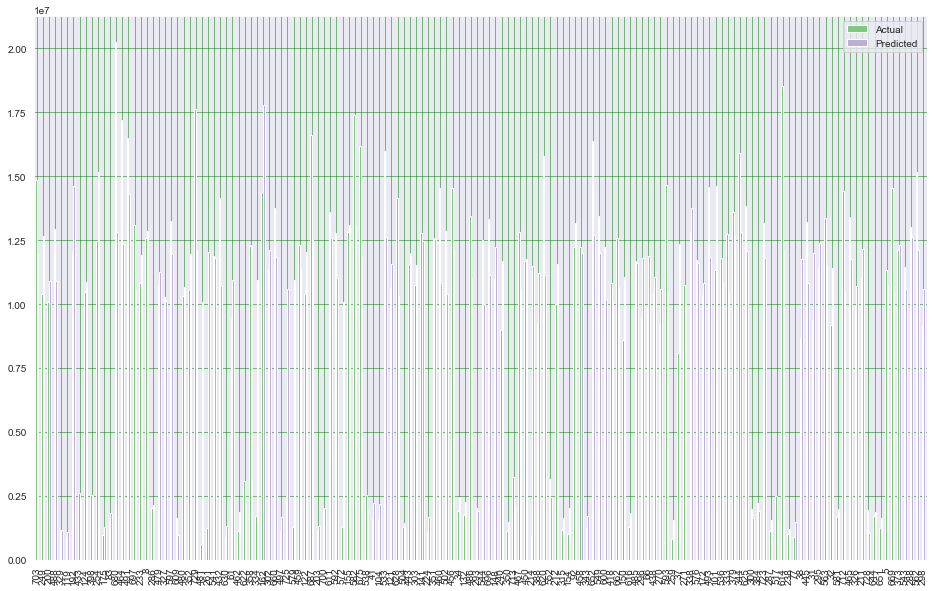

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
print('{} | {}'.format(x_test.shape[0], y_test.shape[0]))

146 | 146


In [18]:
#plt.scatter(x_test, y_pred,  color='gray')
plt.scatterplot(x_test, y_pred, color='red', linewidth=2)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

In [19]:
xgb_pred = xgb_model.predict(x_valid)
lgb_pred = lgb_model.predict(x_valid)
blend_pred = (xgb_pred + lgb_pred) / 2

mean_squared_error(y_valid, xgb_pred), mean_squared_error(y_valid, lgb_pred), mean_squared_error(y_valid, blend_pred)

(248319194279.26328, 1417630789150.8433, 643208495537.5352)

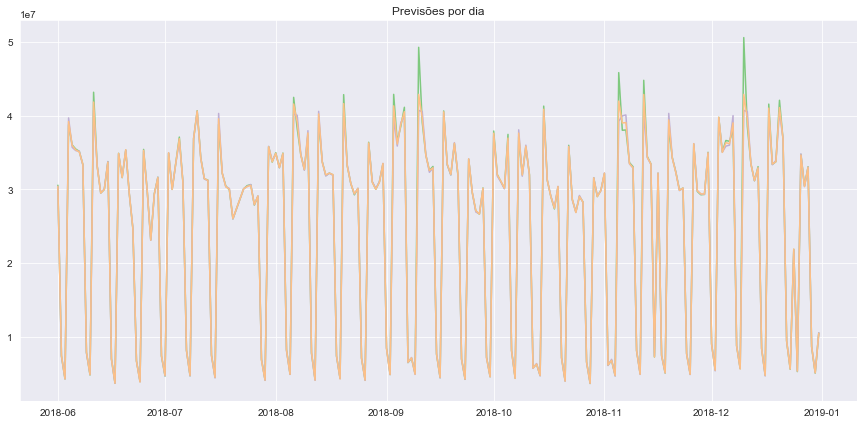

In [36]:
plt.figure(figsize=(15, 7))
plt.plot(df_valid.data, y_valid)
plt.plot(df_valid.data, lgb_pred)
plt.plot(df_valid.data, blend_pred)
plt.title('Previsões por dia')
plt.show()

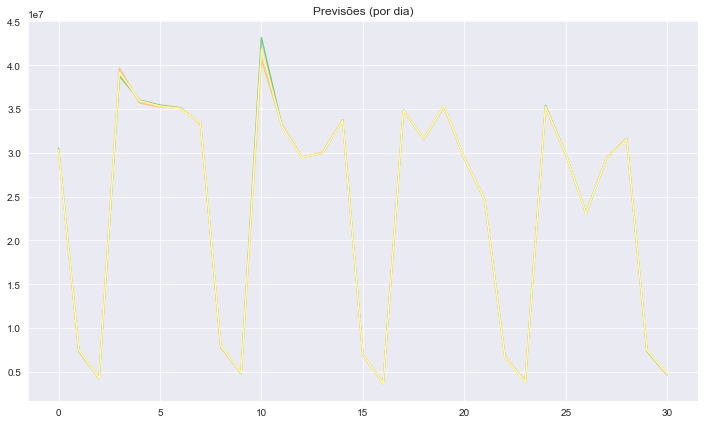

In [44]:
plt.figure(figsize=(12, 7))
plt.plot(y_valid[:31])
plt.plot(blend_pred[:31])
plt.plot(lgb_pred[:31])
plt.plot(blend_pred[:31])
plt.title('Previsões (por dia)')
#plt.grid(True)
plt.show()

In [24]:
#data = pd.to_datetime('10/06/2019', format='%d/%m/%Y')
diaMes = 10
diaSemana = 0
diaUtil = 1
fds = 0
dia5Util = 0
dia10Util = 1
segDia10 = 1

entrada = [[diaMes, diaSemana, diaUtil, fds, dia5Util, dia10Util, segDia10]]
print('Qtd: {0:.2f}'.format(xgb_model.predict(entrada)[0]))
print('Qtd: {:.2f}'.format(lgb_model.predict(entrada)[0]))
#print('Qtd: {}'.format(blend_pred.predict(entrada)[0]))
print('Qtd: {:.2f}'.format(modelo.predict(entrada)[0]))

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']
expected f7 in input data

In [27]:
import numpy as np
import pandas as pd
from datetime import date, datetime, timezone

data = pd.read_csv('./transactions.csv')
data.columns = ['data', 'totalTrsc']
data.tail()

,data,totalTrsc
1808,16/05/2019,36587356
1809,17/05/2019,36779502
1810,18/05/2019,10461572
1811,19/05/2019,6819558
1812,20/05/2019,49935265


In [28]:
data['data'] = pd.to_datetime(data['data'], format='%d/%m/%Y')
data['diaMes'] = data['data'].dt.day
data['diaSemana'] = (data['data'].dt.dayofweek)
data['diaUtil'] = (data['diaSemana'] < 5)
data['fds'] = (data['diaSemana'] >= 5)
data['qntDiaUtil'] = ((data['fds'] == False) & (data['diaMes'] == 5))
data['decDiaUtil'] = ((data['fds'] == False) & (data['diaMes'] == 10))
data['segDia10'] = ((data['data'].dt.dayofweek == 0) & (data['diaMes'] == 10))

trocar = {
    True : 1,
    False : 0
}
data.diaUtil = data.diaUtil.map(trocar)
data.fds = data.fds.map(trocar)
data['qntDiaUtil'] = data['qntDiaUtil'].map(trocar)
data['decDiaUtil'] = data['decDiaUtil'].map(trocar)
data['segDia10'] = data['segDia10'].map(trocar)
data.dtypes

data          datetime64[ns]
totalTrsc              int64
diaMes                 int64
diaSemana              int64
diaUtil                int64
fds                    int64
qntDiaUtil             int64
decDiaUtil             int64
segDia10               int64
dtype: object

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

x = data[['diaMes', 'diaSemana', 'diaUtil', 'fds', 'qntDiaUtil', 'decDiaUtil', 'segDia10']][:730]
y = data['totalTrsc'][:730]

SEED = 5
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_treino), len(y_teste)))
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)
print('R² = {}'.format(modelo.score(x_treino, y_treino).round(2)))
y_previsto = modelo.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(2))

Treinaremos com 547 elementos e testaremos com 183 elementos
R² = 0.77
R² = 0.72


In [33]:
diaMes = 10
diaSemana = 0
diaUtil = 1
fds = 0
qntDiaUtil = 0
decDiaUtil = 1
segDia10 = 1
entrada = [[diaMes, diaSemana, diaUtil, fds, qntDiaUtil, decDiaUtil, segDia10]]
previsao = modelo.predict(entrada)[0]
print('Qtd: {0:.2f}'.format(previsao))
data.totalTrsc.max()

Qtd: 16094979.50


51959223

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data, y_teste)
#plt.plot(data, modelo.predict(entrada)[0])
plt.title('Previsões por dia')
plt.show()